Part 1: Importing LIbraries and Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

In [3]:
!pip install gdown

In [4]:
!gdown --id 1aMawm6-VXGttWaklFltjyvXc_Wcz40ez

Downloading...
From: https://drive.google.com/uc?id=1aMawm6-VXGttWaklFltjyvXc_Wcz40ez
To: /content/Healthcare_Investments_and_Hospital_Stay (1).csv
100% 15.3k/15.3k [00:00<00:00, 12.8MB/s]


Part 2: Visualizing Data

In [5]:
data = pd.read_csv('/content/Healthcare_Investments_and_Hospital_Stay (1).csv')

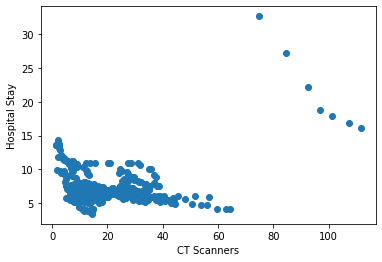

In [6]:
plt.xlabel("CT Scanners")
plt.ylabel("Hospital Stay")
plt.scatter(data['CT_Scanners'],data['Hospital_Stay'])

<BarContainer object of 518 artists>

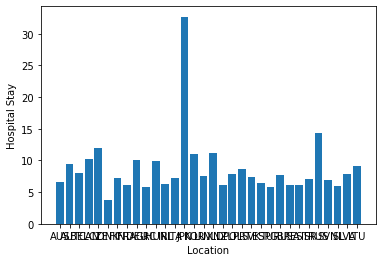

In [29]:
plt.xlabel("Location")
plt.ylabel("Hospital Stay")
plt.bar(data['Location'],(data['Hospital_Stay']))

Part 3: Preprocessing the Data

In [7]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [8]:
def preprocess_inputs(df):
    df = df.copy()
    
    # One-hot encode Location column
    df = onehot_encode(df, column='Location')
    
    # Split df into X and y
    y = df['Hospital_Stay'].copy()
    X = df.drop('Hospital_Stay', axis=1).copy()
    print(df)
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

     Time  Hospital_Stay  MRI_Units  CT_Scanners  ...  SVK  SVN  TUR  USA
0    1992            6.6       1.43        16.71  ...    0    0    0    0
1    1994            6.4       2.36        18.48  ...    0    0    0    0
2    1995            6.5       2.89        20.55  ...    0    0    0    0
3    1996            6.4       2.96        21.95  ...    0    0    0    0
4    1997            6.2       3.53        23.34  ...    0    0    0    0
..    ...            ...        ...          ...  ...  ...  ...  ...  ...
513  2014            6.8      10.57        22.17  ...    0    0    0    0
514  2015            6.6      11.02        21.00  ...    0    0    0    0
515  2016            6.6      12.20        23.01  ...    0    0    0    0
516  2017            6.5      12.37        23.33  ...    0    0    0    0
517  2018            6.5      12.49        24.27  ...    0    0    0    0

[518 rows x 37 columns]


Training Random Forest Regressor

In [10]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Analyzing the Results

In [ ]:
y_pred = rfr.predict(X_test)
np.set_printoptions(precision=2)

In [ ]:
print(y_pred.reshape(-1, 1))

In [ ]:
print(y_test.head)

In [11]:
print("Accuracy (R^2) Score: {:.5f}".format(rfr.score(X_test, y_test)))

Accuracy (R^2) Score: 0.95943


In [13]:
##Should dump model to file
from joblib import dump, load
dump(rfr, '20210716-LengthOfStayModelDump.joblib') 

['20210716-LengthOfStayModelDump.joblib']